In [98]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [99]:
# Read in csv file
cleanData = pd.read_csv("clean_dataset.csv")

# Scale the "Debt" column back to its original values and cast to int
cleanData['CreditScore'] = cleanData['CreditScore'].apply(
    lambda x: round(x * (850 - 300) / (67 - 0) + 300)
).astype(int)

# Scale the "Debt" column back to its original values
cleanData['Debt'] = (cleanData['Debt'] * 1000).astype(int)

# Scale the "Income" column back to its original values
cleanData['Income'] = (cleanData['Income'] * 1000).astype(int)

# Cast the "Age" column to integers
cleanData['Age'] = cleanData['Age'].astype(int)

# Case the "YearsEmployed" column to integers
cleanData['YearsEmployed'] = cleanData['YearsEmployed'].astype(int)

# Print Raw Data
print(cleanData)

     Gender  Age   Debt  Married  BankCustomer         Industry Ethnicity  \
0         1   30      0        1             1      Industrials     White   
1         0   58   4460        1             1        Materials     Black   
2         0   24    500        1             1        Materials     Black   
3         1   27   1540        1             1      Industrials     White   
4         1   20   5625        1             1      Industrials     White   
..      ...  ...    ...      ...           ...              ...       ...   
685       1   21  10085        0             0        Education     Black   
686       0   22    750        1             1           Energy     White   
687       0   25  13500        0             0       Healthcare    Latino   
688       1   17    205        1             1  ConsumerStaples     White   
689       1   35   3375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Employed  CreditScore  DriversLicense  \


In [100]:
# Find typical values for each variable
print(cleanData.describe())

           Gender         Age          Debt     Married  BankCustomer  \
count  690.000000  690.000000    690.000000  690.000000    690.000000   
mean     0.695652   31.066667   4758.724638    0.760870      0.763768   
std      0.460464   11.859906   4978.163249    0.426862      0.425074   
min      0.000000   13.000000      0.000000    0.000000      0.000000   
25%      0.000000   22.000000   1000.000000    1.000000      1.000000   
50%      1.000000   28.000000   2750.000000    1.000000      1.000000   
75%      1.000000   37.000000   7207.500000    1.000000      1.000000   
max      1.000000   80.000000  28000.000000    1.000000      1.000000   

       YearsEmployed  PriorDefault    Employed  CreditScore  DriversLicense  \
count      690.00000    690.000000  690.000000   690.000000      690.000000   
mean         1.93913      0.523188    0.427536   319.653623        0.457971   
std          3.32808      0.499824    0.495080    39.913590        0.498592   
min          0.00000      

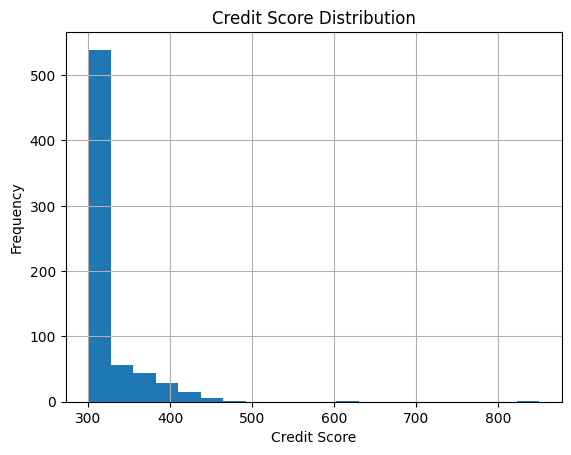

In [101]:
# Histogram for Credit Score
cleanData['CreditScore'].hist(bins=20)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

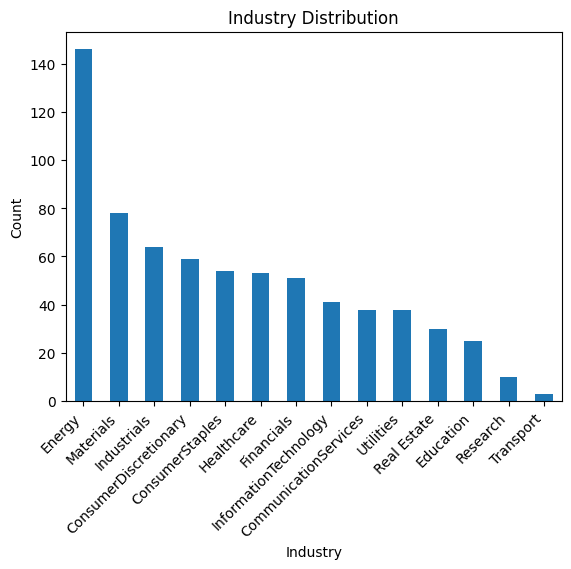

In [124]:
# Bar chart for Industry
cleanData['Industry'].value_counts().plot(kind='bar')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

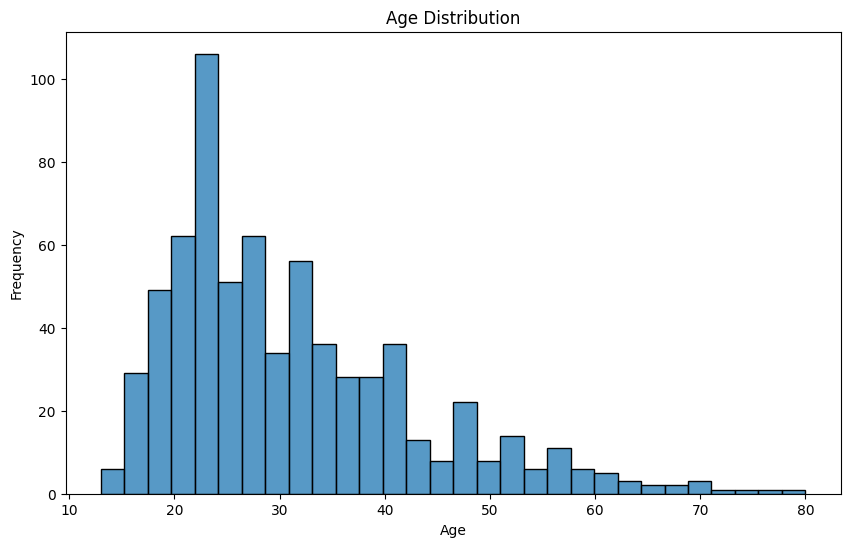

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=cleanData, x='Age', bins=30)
hist_plot.set_title('Age Distribution')
hist_plot.set_xlabel('Age')
hist_plot.set_ylabel('Frequency')

plt.show()

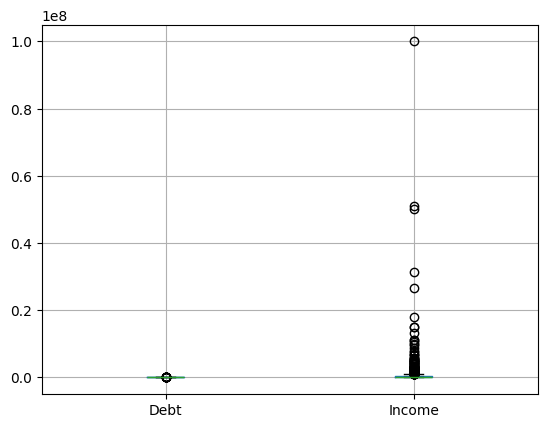

In [125]:
# Boxplot for Debt and Income
cleanData.boxplot(column=['Debt', 'Income'])
plt.show()

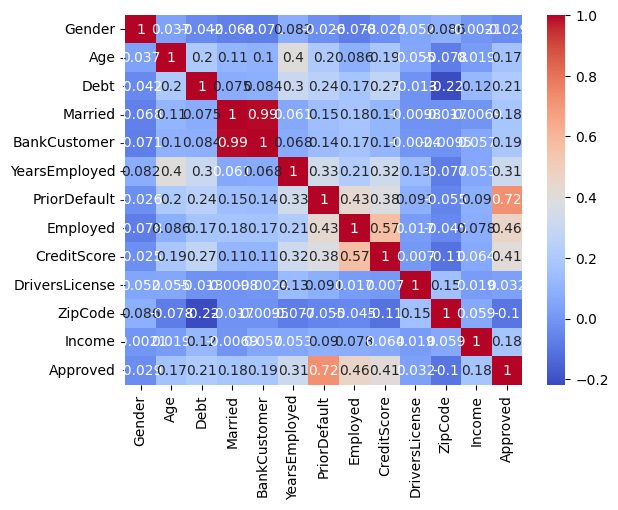

In [126]:
# Numeric columns from the DataFrame
numeric_df = cleanData.select_dtypes(include='number')

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

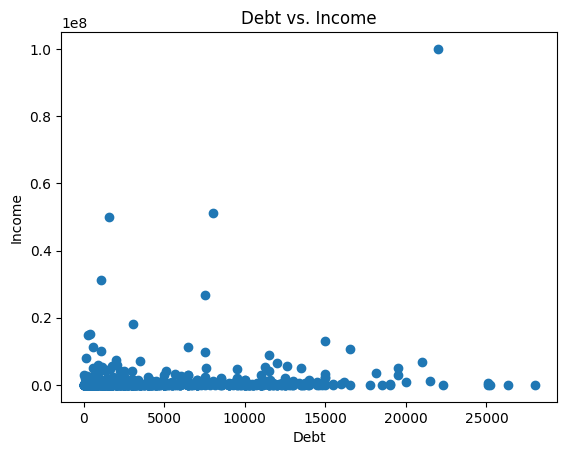

In [127]:
# Scatter plot for Debt and Income
plt.scatter(cleanData['Debt'], cleanData['Income'])
plt.title('Debt vs. Income')
plt.xlabel('Debt')
plt.ylabel('Income')
plt.show()

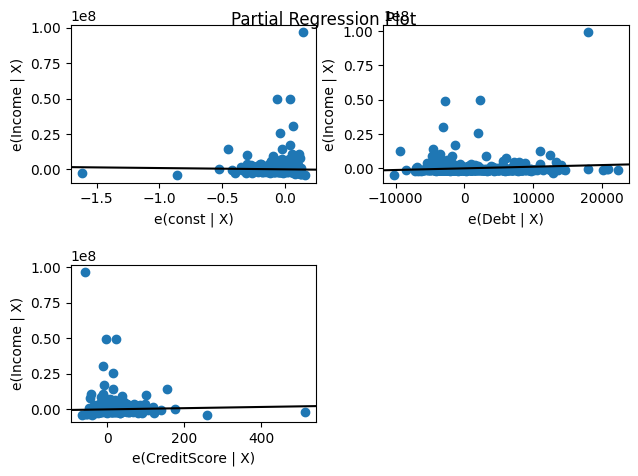

In [128]:
# Income and Debt while controlling for CreditScore
fig = sm.graphics.plot_partregress_grid(
    sm.OLS(cleanData['Income'], sm.add_constant(cleanData[['Debt', 'CreditScore']])).fit()
)
plt.show()

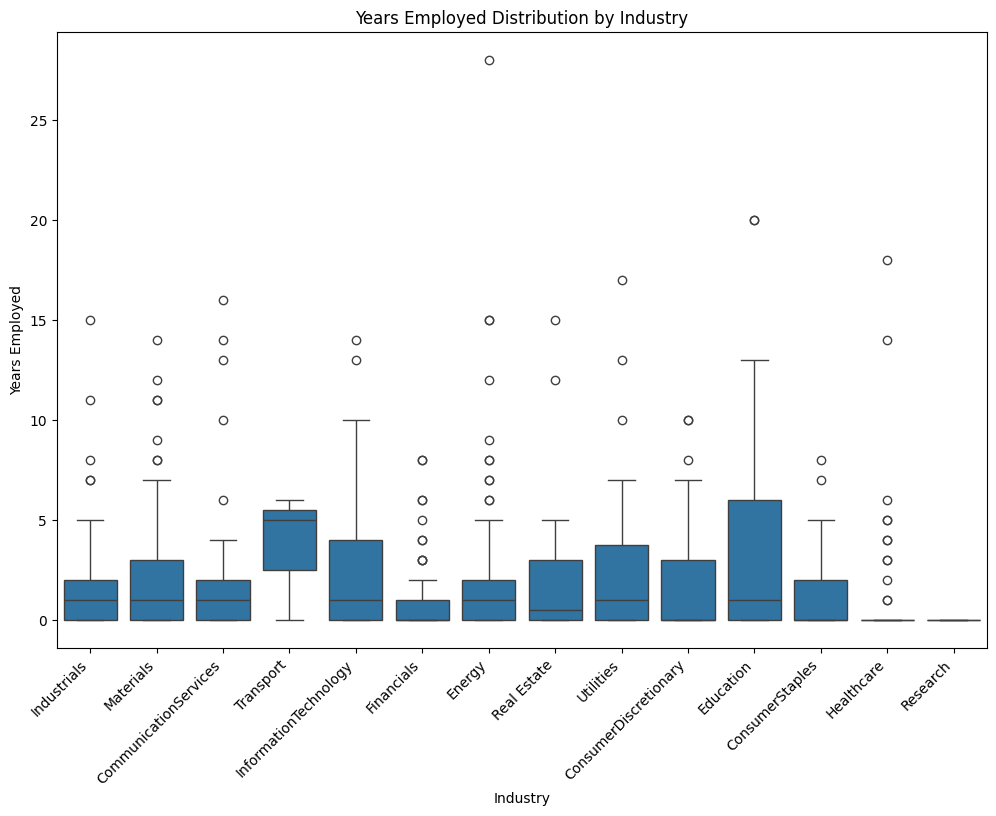

In [129]:
# A boxplot of YearsEmployed by Industry
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=cleanData, x='Industry', y='YearsEmployed')
boxplot.set_title('Years Employed Distribution by Industry')
boxplot.set_xlabel('Industry')
boxplot.set_ylabel('Years Employed')

plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_112284\764090387.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(['Gender 0', 'Gender 1'])


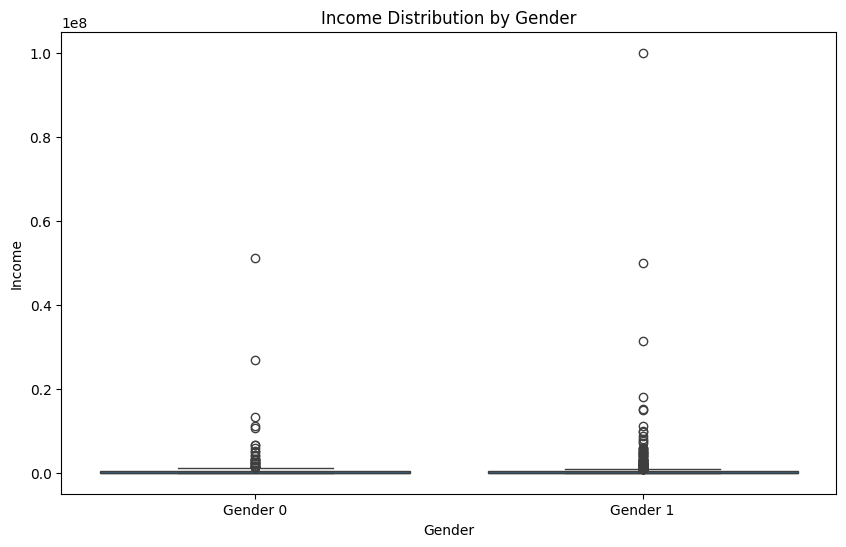

In [139]:
# Create a boxplot of Income by Gender
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Gender', y='Income', data=cleanData)
boxplot.set_title('Income Distribution by Gender')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Income')
boxplot.set_xticklabels(['Gender 0', 'Gender 1'])

plt.show()

C:\Users\Matthew\AppData\Local\Temp\ipykernel_112284\3300925675.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(['Gender 0', 'Gender 1'])


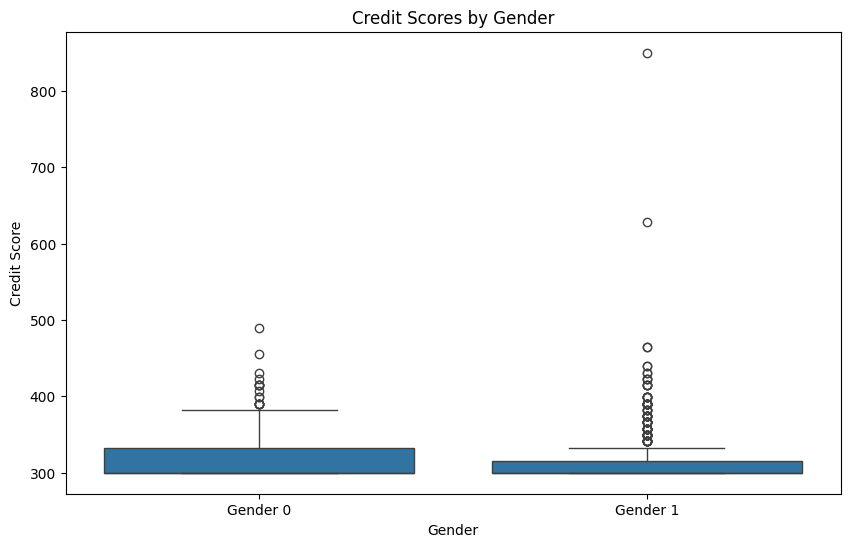

In [148]:
# A boxplot of CreditScore by Gender
plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='Gender', y='CreditScore', data=cleanData)
boxplot.set_title('Credit Scores by Gender')
boxplot.set_xlabel('Gender')
boxplot.set_ylabel('Credit Score')
boxplot.set_xticklabels(['Gender 0', 'Gender 1'])

plt.show()

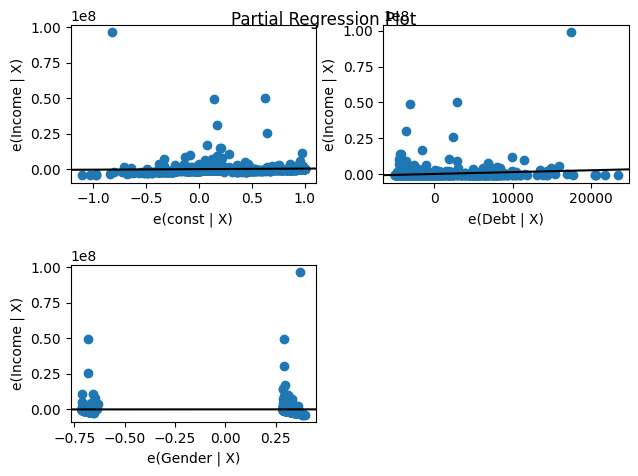

In [149]:
# Income and Debt while controlling for Gender
fig = sm.graphics.plot_partregress_grid(
    sm.OLS(cleanData['Income'], sm.add_constant(cleanData[['Debt', 'Gender']])).fit()
)
plt.show()

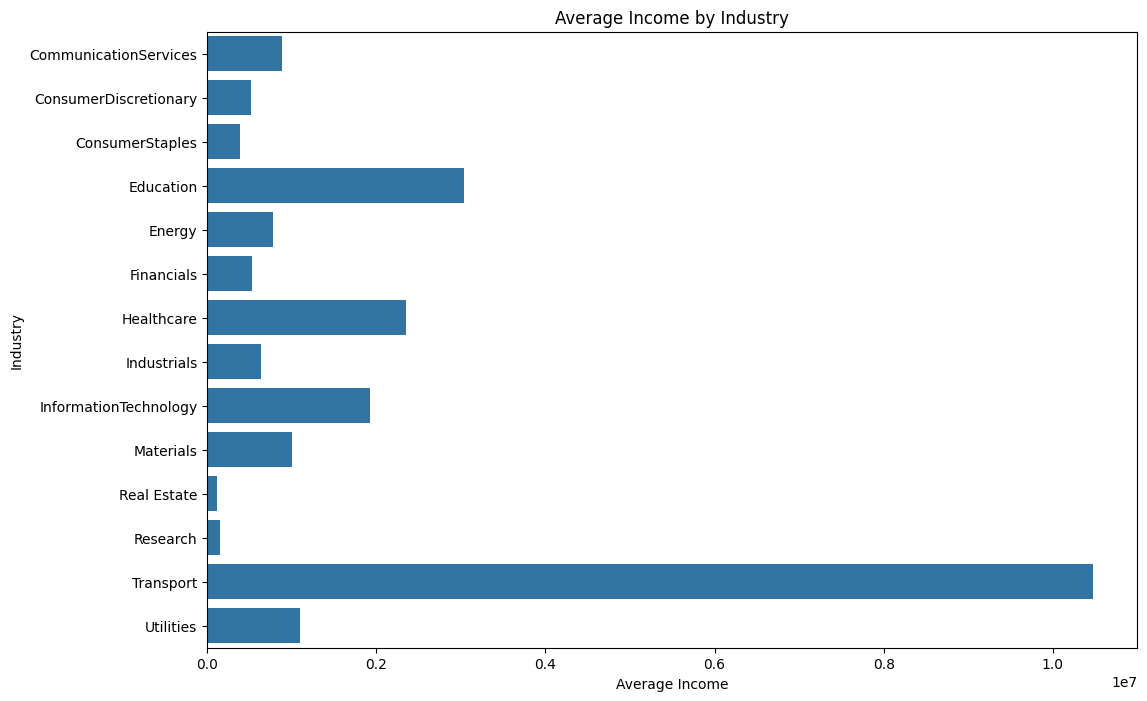

In [174]:
# Bar graph for average income by industry
industry_income = cleanData.groupby('Industry')['Income'].mean().reset_index()
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Income', y='Industry', data=industry_income)
barplot.set_title('Average Income by Industry')
barplot.set_xlabel('Average Income')
barplot.set_ylabel('Industry')

plt.show()

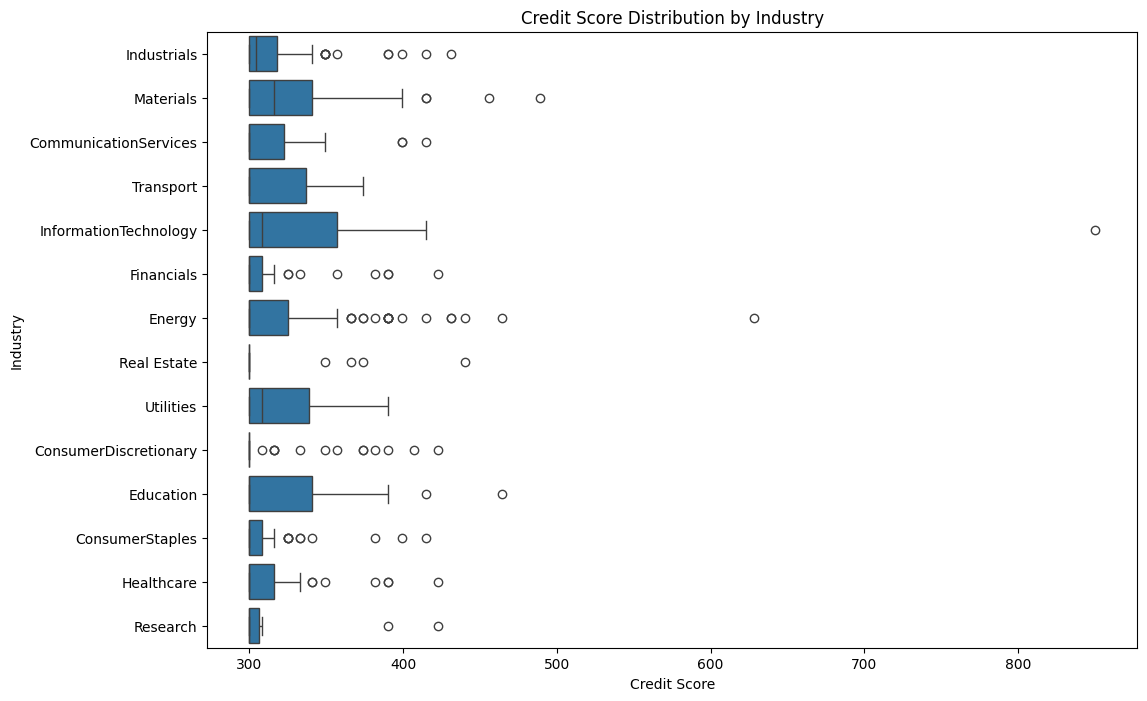

In [181]:
# Boxplot of credit score by industry
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='CreditScore', y='Industry', data=cleanData)
boxplot.set_title('Credit Score Distribution by Industry')
boxplot.set_xlabel('Credit Score')
boxplot.set_ylabel('Industry')

plt.show()

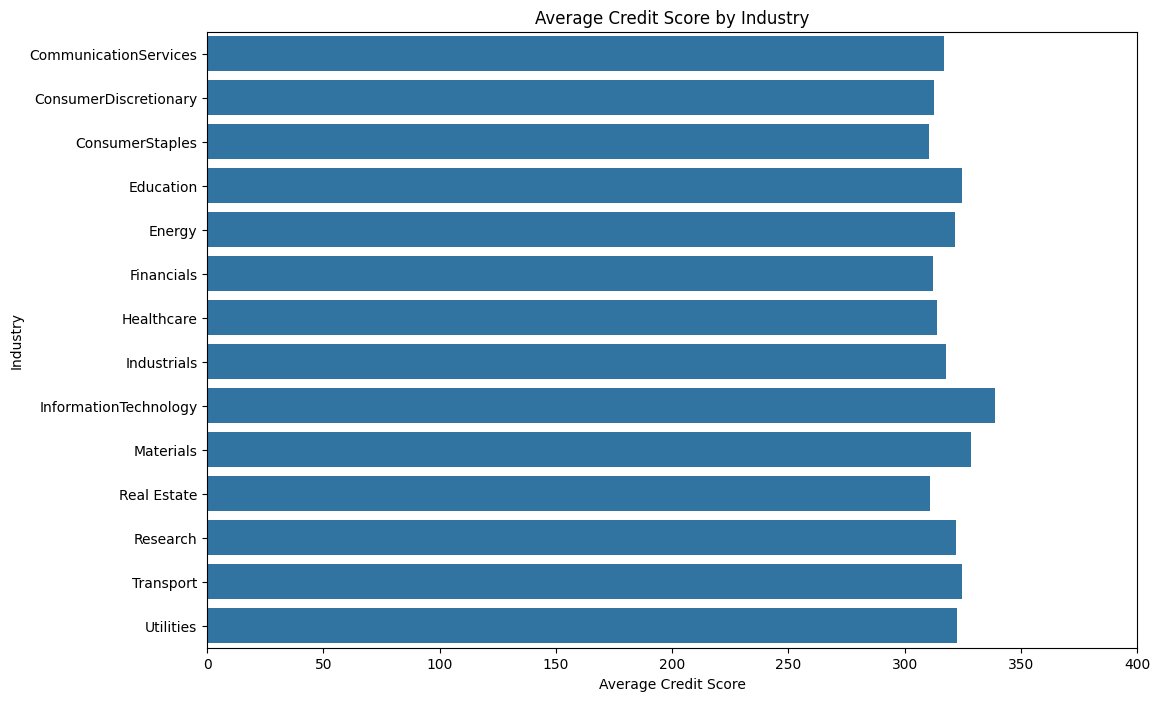

In [182]:
# Bar graph for average credit score by industry
industry_credit_score = cleanData.groupby('Industry')['CreditScore'].mean().reset_index()
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='CreditScore', y='Industry', data=industry_credit_score)
barplot.set_title('Average Credit Score by Industry')
barplot.set_xlabel('Average Credit Score')
barplot.set_ylabel('Industry')
plt.xlim(0, 400)

plt.show()

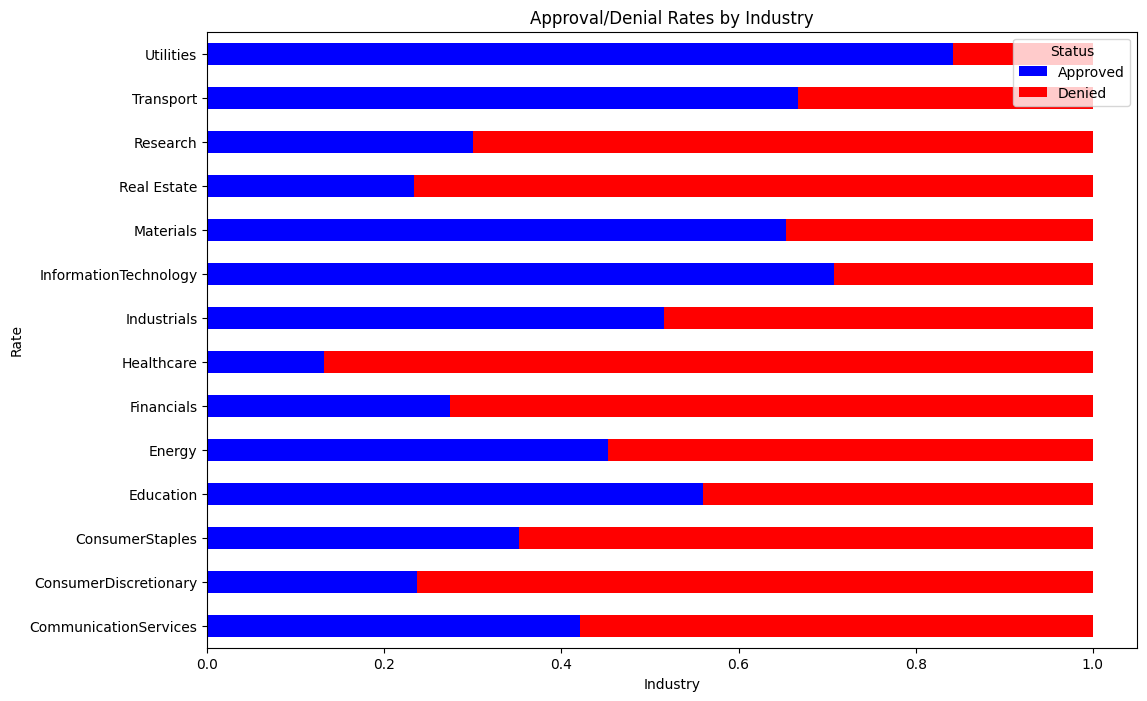

In [183]:
# Stacked bar chart for approval/denial rates by industry
industry_approval_counts = cleanData.groupby(['Industry', 'Approved']).size().unstack(fill_value=0)
industry_approval_rates = industry_approval_counts.div(industry_approval_counts.sum(axis=1), axis=0)
industry_approval_rates = industry_approval_rates[[1, 0]]
industry_approval_rates.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#0000FF', '#FF0000'])
plt.title('Approval/Denial Rates by Industry')
plt.xlabel('Industry')
plt.ylabel('Rate')
plt.legend(['Approved', 'Denied'], title='Status')

plt.show()

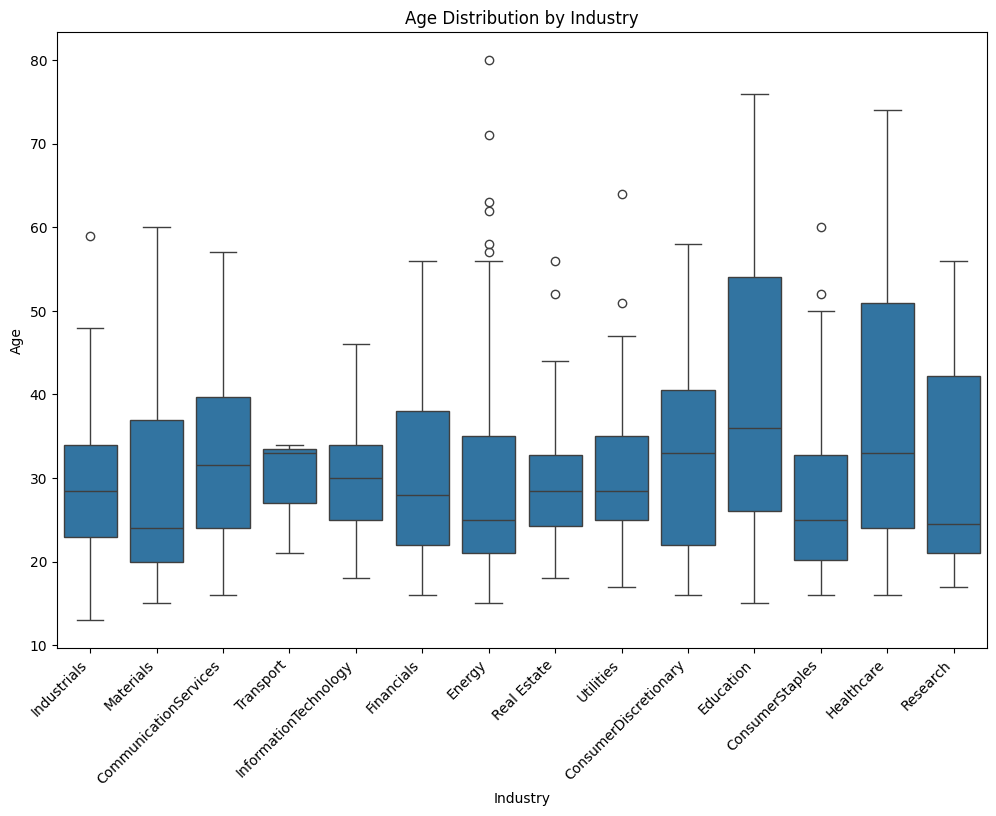

In [185]:
# Boxplot of Age by Industry
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(data=cleanData, x='Industry', y='Age')
boxplot.set_title('Age Distribution by Industry')
boxplot.set_xlabel('Industry')
boxplot.set_ylabel('Age')
plt.xticks(rotation=45, ha='right')

plt.show()